# 데이터 분석

In [38]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Metric
from sklearn.metrics import mean_squared_error

# 검증, 최적의 파라미터
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Regressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


# 경고 무시
import warnings
warnings.filterwarnings('ignore')


In [39]:
# 데이터 읽어오기
df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/Term_Project_#2/car_price_prediction.csv')
df

# ID : 식별번호
# Price : 가격 (타겟 칼럼)
# Levy : 수수료
# Manufacturer : 제조업체
# Model : 모델
# Prod.year : 생산년도
# Category : 카테고리
# Leather interior : 가죽 인테리어
# Fuel type : 연료 종류
# Engine volume : 배기량
# Mileage : 주행 거리
# Cylinders : 실린더 수 (기통)
# Gear box type : 변속기 타입
# Drive wheels : 구동륜
# Doors : 차문
# Wheel : 운전석 위치
# Color : 색깔
# Airbags : 에어백 갯수

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [40]:
# 데이터 정보
df.describe()
# 전처리 때 숫자형 과 문자형을 나눠주기

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [41]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [42]:
# 위에를 보고 null값이 없는 줄 알았는데 데이터를 까보니 Levy 갈럼에서 '-'로 null값이 있었다.
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('----------------------------------------------')

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
----------------------------------------------
Price
[13328 16621  8467 ... 56814 63886 22075]
----------------------------------------------
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '149

# 데이터 전처리

## 칼럼별 데이터 전처리 전략
1. 학습에 영향을 끼쳐서는 안되는 ID 칼럼을 drop해준다.
2. Leather interior는 불 타입으로 변환해주기
3. Engine volume 칼럼은 특이하게 Turbo인 것과 아닌 것이 또 나뉘어진다. Turbo 칼럼을 하나 새로 만들기
4. Mileage 데이터의 단위(km)를 제거하고 int형으로 바꿔주기
5. Doors 칼럼은 이상하게 날짜가 들어가있다. 문의 수로 바꿔주기
6. Price, Levy, Mileage 이상치 제거
7. Levy null값 채우기
8. 숫자형 데이터, 카테고리형 데이터, 타겟으로 나눠주기
9. 숫자형 데이터 스케일링
10. 카테고리형 데이터 인코딩
11. train셋과 test셋으로 데이터 split

In [43]:
# 1. 학습에 영향을 끼쳐서는 안되는 ID 칼럼을 drop해준다.

df.drop(['ID'], axis=1, inplace=True)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [44]:
# 2. Leather interior는 불 타입으로 변환해주기

# Yes는 True로, No는 False로
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)
df['Leather interior'].unique()

array([ True, False])

In [45]:
# 3. Engine volume 칼럼은 특이하게 Turbo인 것과 아닌 것이 또 나뉘어진다.

# Turbo 칼럼을 만들어 Engine volume 칼럼에서 Turbo가 있으면 True로, 없으면 False로
df['Turbo'] = df['Engine volume'].str.contains('Turbo')

# Engine Volume 칼럼에서 숫자 부분만 슬라이싱
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
# 타입도 실수형으로 바꿔준다.
df['Engine volume'] = df['Engine volume'].astype('float64')

df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,8467,-,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,3607,862,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,11726,446,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,True,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,True
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,True,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,False
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,True,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,False
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,True,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,False


In [46]:
# 4. Mileage 데이터의 단위(km)를 제거하고 int형으로 바꿔주기

df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')
df['Mileage'].value_counts()

Mileage
0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: count, Length: 7687, dtype: int64

In [47]:
# 5. Doors 칼럼은 이상하게 날짜가 들어가있다.
# 04-May -> 문 4개
# 02-Mar -> 문 2개
# >5     -> 문 5개 로 판단하였다.

df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
df['Doors'].value_counts()

Doors
4    18332
2      777
5      128
Name: count, dtype: int64

In [48]:
# 6. Price, Levy, Mileage 이상치 제거

# 차의 Price가 1달러거나 2630만 달러인 것은 이상치로 확인된다.
df['Price'].sort_values()

7815            1
16992           1
13419           3
17596           3
7276            3
           ...   
14839      297930
5008       308906
1225       627220
8541       872946
16983    26307500
Name: Price, Length: 19237, dtype: int64

In [49]:
# Levy의 이상치를 제거하기 위해 일단 '-' 대신 null로 채우고 형변환
df['Levy'].replace({'-':np.nan}, inplace = True)
df['Levy'] = df['Levy'].astype('float64')
df['Levy'].sort_values()

2010     87.0
7022     87.0
3105     87.0
10603    87.0
12917    87.0
         ... 
19223     NaN
19224     NaN
19226     NaN
19229     NaN
19232     NaN
Name: Levy, Length: 19237, dtype: float64

In [50]:
# 주행거리가 21억km 인 것은 솔직히 말이 안된다. 이상치로 확인
df['Mileage'].sort_values()

1667              0
9799              0
9801              0
9813              0
2285              0
            ...    
11901    2147483647
15393    2147483647
2278     2147483647
15347    2147483647
12734    2147483647
Name: Mileage, Length: 19237, dtype: int64

<Axes: >

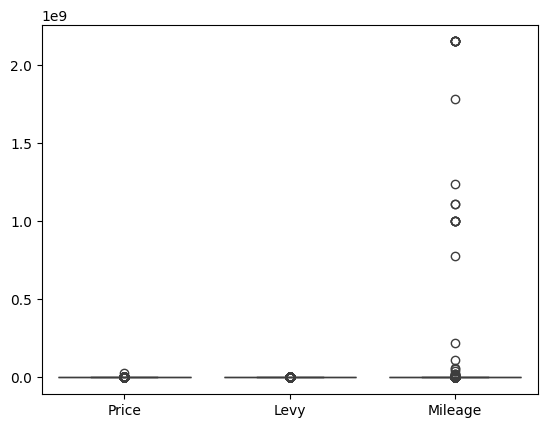

In [51]:
# 이 차트로 이상치를 확인할 수 있다.
sns.boxplot(df[['Price', 'Levy', 'Mileage']])

<Axes: >

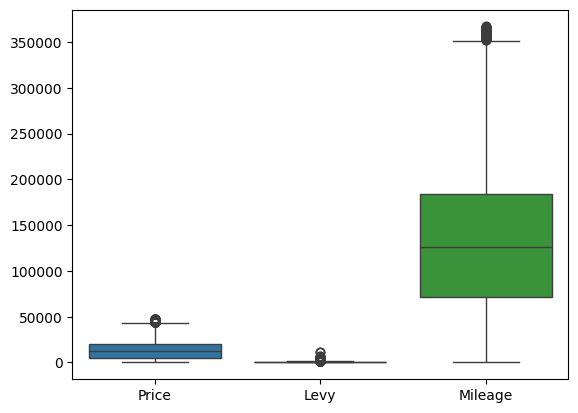

In [52]:
# 이상치 제거

# 이상치 제거할 칼럼
columns = ['Price', 'Levy', 'Mileage']

# 이상치 인덱스를 반환하는 함수
def get_outlier(columns):
    outlier_index = []
    for column in columns:
        perc25 = np.percentile(df[column], 25)
        perc75 = np.percentile(df[column], 75)
        iqr = perc75 - perc25
        lowest = perc25 - 1.5 * iqr
        highest = perc75 + 1.5 * iqr
        outlier_index.extend(df[(df[column] < lowest) | (df[column] > highest)].index)
    return outlier_index

# 이상치 인덱스를 제거해준다.
outlier = get_outlier(columns)
df.drop(df.loc[outlier].index, axis=0, inplace=True)

sns.boxplot(df[columns])

<Axes: xlabel='Levy', ylabel='Count'>

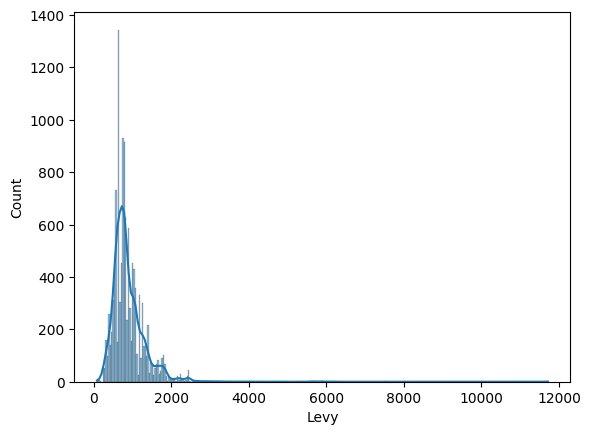

In [53]:
# 7. Levy null값 채우기

# Levy의 히스토그램을 살펴보자
sns.histplot(df['Levy'], kde=True)

In [54]:
# null을 평균값으로 대체해도 될 것 같다.

df['Levy'].replace({np.nan:df['Levy'].mean()}, inplace=True)
df['Levy'].isnull().sum()

0

In [55]:
# 8. 숫자형 데이터, 카테고리형 데이터, 타겟으로 나눠주기

df_num = df[['Levy','Prod. year', 'Engine volume','Mileage', 'Cylinders', 'Doors', 'Airbags']]
df_cat = df[['Manufacturer','Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']]
y = df['Price']

In [56]:
# 9. 숫자형 데이터 스케일링

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_num_scaled, columns=df_num.columns)
df_num

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
0,1.292433e+00,-0.121793,1.412037,0.659053,1.242618,0.186856,1.247089
1,3.136834e-01,0.057455,0.833297,0.732750,1.242618,0.186856,0.323146
2,2.920498e-16,-0.838783,-1.134419,0.831095,-0.476896,0.186856,-1.062770
3,-8.706446e-02,0.057455,0.254557,0.449591,-0.476896,0.186856,-1.524742
4,-1.155726e+00,0.595198,-1.134419,-0.497777,-0.476896,0.186856,-0.600798
...,...,...,...,...,...,...,...
17522,2.920498e-16,-2.093517,-0.324183,2.060405,-0.476896,-4.726904,-0.369812
17523,-1.667003e-01,0.057455,0.138809,0.359040,-0.476896,0.186856,0.323146
17524,-1.538558e-01,-0.121793,-0.324183,-0.197038,-0.476896,0.186856,-0.600798
17525,1.007286e+00,-0.659536,-0.324183,-0.997405,-0.476896,0.186856,-0.600798


In [57]:
# 10. 카테고리형 데이터 인코딩

encoder = OneHotEncoder()
df_cat_encoded = encoder.fit_transform(df_cat)
new_column_names = encoder.get_feature_names_out(df_cat.columns)
df_cat = pd.DataFrame(df_cat_encoded.toarray(), columns=new_column_names)
df_cat

,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_False,Turbo_True
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
# 데이터프레임 합쳐주기
df_car = pd.concat([df_num, df_cat], axis=1)
df_car

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_False,Turbo_True
0,1.292433e+00,-0.121793,1.412037,0.659053,1.242618,0.186856,1.247089,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,3.136834e-01,0.057455,0.833297,0.732750,1.242618,0.186856,0.323146,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.920498e-16,-0.838783,-1.134419,0.831095,-0.476896,0.186856,-1.062770,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-8.706446e-02,0.057455,0.254557,0.449591,-0.476896,0.186856,-1.524742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.155726e+00,0.595198,-1.134419,-0.497777,-0.476896,0.186856,-0.600798,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17522,2.920498e-16,-2.093517,-0.324183,2.060405,-0.476896,-4.726904,-0.369812,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17523,-1.667003e-01,0.057455,0.138809,0.359040,-0.476896,0.186856,0.323146,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17524,-1.538558e-01,-0.121793,-0.324183,-0.197038,-0.476896,0.186856,-0.600798,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17525,1.007286e+00,-0.659536,-0.324183,-0.997405,-0.476896,0.186856,-0.600798,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# 11. 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(df_car, y, test_size=0.2, random_state = 13)

# 회귀 및 파라미터 최적화

# Linear Regression

In [61]:
lir = LinearRegression()
lir.fit(X_train, y_train)

y_hat = lir.predict(X_test)
lir_mse = mean_squared_error(y_test, y_hat)
lir_rmse = np.sqrt(lir_mse)

print(lir_mse)
print(lir_rmse)

3.6499233365600304e+28
191047725360969.2


In [62]:
lir_neg_mse = cross_val_score(lir, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lir_rmse = np.sqrt(-1*lir_neg_mse)
lir_avg_rmse = np.mean(lir_rmse)
lir_avg_rmse

516057889982690.6

# Decision Tree Regressor

In [63]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_hat = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_hat)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

7274.846558300636

In [64]:
dt_neg_mse = cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
dt_rmse = np.sqrt(-1*dt_neg_mse)
dt_avg_rmse = np.mean(dt_rmse)
dt_avg_rmse

7380.312112810403

# Random Forest Regressor

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_hat)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

5657.663709609635

In [66]:
rf_neg_mse = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_rmse = np.sqrt(-1*rf_neg_mse)
rf_avg_rmse = np.mean(rf_rmse)
rf_avg_rmse

5705.270622431929

In [78]:
rf_params = {'n_estimators' : [100, 120],
             'max_features' : [30, 35]}

# GridSearchCV
rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring='neg_mean_squared_error', cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

y_hat = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, y_hat)
rf_rmse = np.sqrt(rf_mse)

print(rf_grid.best_params_)
print(rf_rmse)

{'max_features': 35, 'n_estimators': 120}
5885.136364944287


# Ridge

In [68]:
ridge_alphas = [0.1, 1, 10, 100]
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge_neg_mse = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    ridge_rmse = np.sqrt(-1*ridge_neg_mse)
    ridge_avg_rmse = np.mean(ridge_rmse)
    print(alpha, '->', ridge_avg_rmse)

0.1 -> 8749.365683154483
1 -> 8687.130350856509
10 -> 8725.231388574586
100 -> 8959.422072800831


# Lasso

In [69]:
lasso_alphas = [0.5, 1, 3]
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso_neg_mse = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    lasso_rmse = np.sqrt(-1*lasso_neg_mse)
    lasso_avg_rmse = np.mean(lasso_rmse)
    print(alpha, '->', lasso_avg_rmse)

0.5 -> 8703.473876890781
1 -> 8698.925933956489
3 -> 8757.426581080053


# ElasticNet

In [70]:
alphas = [0.07, 0.1, 0.5, 1, 3]
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.7)
    elastic_neg_mse = cross_val_score(elastic, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    elastic_rmse = np.sqrt(-1*elastic_neg_mse)
    elastic_avg_rmse = np.mean(elastic_rmse)
    print(alpha, '->', elastic_avg_rmse)

0.07 -> 9110.756266650616
0.1 -> 9184.309815286135
0.5 -> 9634.963589859664
1 -> 9932.390085374986
3 -> 10494.066395101574


# Logistic Regression

In [71]:
lor = LogisticRegression()
lor.fit(X_train, y_train)

y_hat = lor.predict(X_test)
lor_mse = mean_squared_error(y_test, y_hat)
lor_rmse = np.sqrt(lor_mse)
lor_rmse

9982.026799586687

In [72]:
lor_neg_mse = cross_val_score(lor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lor_rmse = np.sqrt(-1*lor_neg_mse)
lor_avg_rmse = np.mean(lor_rmse)
lor_avg_rmse

9689.161264477687

In [79]:
# 규제를 만들어보자
penalties = ['l2', 'l1']
Cs = [5, 10, 15]

for penalty in penalties:
    print(penalty)
    for C in Cs:
        lor = LogisticRegression(penalty=penalty, C=C, solver='liblinear')
        lor_neg_mse = cross_val_score(lor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
        lor_rmse = np.sqrt(-1*lor_neg_mse)
        lor_avg_rmse = np.mean(lor_rmse)
        print(C, '->', lor_avg_rmse)

l2
5 -> 9420.083796974626
10 -> 9295.665017564661
15 -> 9249.747291834148
l1
5 -> 9400.134020957757
10 -> 9334.549487124872
15 -> 9394.304994193097


# Stacking Ensemble

In [74]:
# 원래 있던 데이터를 나눠주는 함수
def get_data_sets(model,X_train, y_train, X_test):
    kfold = KFold(n_splits=5, shuffle=False)
    y_hat_train = np.zeros((X_train.shape[0], 1))
    y_hat_test = np.zeros((X_test.shape[0], 5))
    
    for index_fold, (index_train, index_valid) in enumerate(kfold.split(X_train)):
        _X_train = X_train.iloc[index_train]
        _y_train = y_train.iloc[index_train]
        _X_valid = X_train.iloc[index_valid]
        model.fit(_X_train, _y_train)
        y_hat_train[index_valid, :] = model.predict(_X_valid).reshape(-1, 1)
        y_hat_test[:, index_fold] = model.predict(X_test)
    y_hat = np.mean(y_hat_test, axis = 1).reshape(-1, 1)
    return y_hat_train, y_hat

X_dt_train, X_dt_test = get_data_sets(dt, X_train, y_train, X_test)
X_rf_train, X_rf_test = get_data_sets(rf_best, X_train, y_train, X_test)
X_ridge_train, X_ridge_test = get_data_sets(ridge, X_train, y_train, X_test)
X_lasso_train, X_lasso_test = get_data_sets(lasso, X_train, y_train, X_test)

# 데이터 병합
X_train_stack = np.concatenate((X_dt_train, X_rf_train, X_ridge_train, X_lasso_train), axis=1)
X_test_stack = np.concatenate((X_dt_test, X_rf_test, X_ridge_test, X_lasso_test), axis=1)

# 제일 잘 나온 rf로 최종 학습
rf_best.fit(X_train_stack, y_train)
y_hat = rf_best.predict(X_test_stack)
rf_mse_stack = mean_squared_error(y_test, y_hat)
rf_rmse_stack = np.sqrt(rf_mse_stack)
rf_rmse_stack

5887.279471800357

# Regressor 정확도 비교

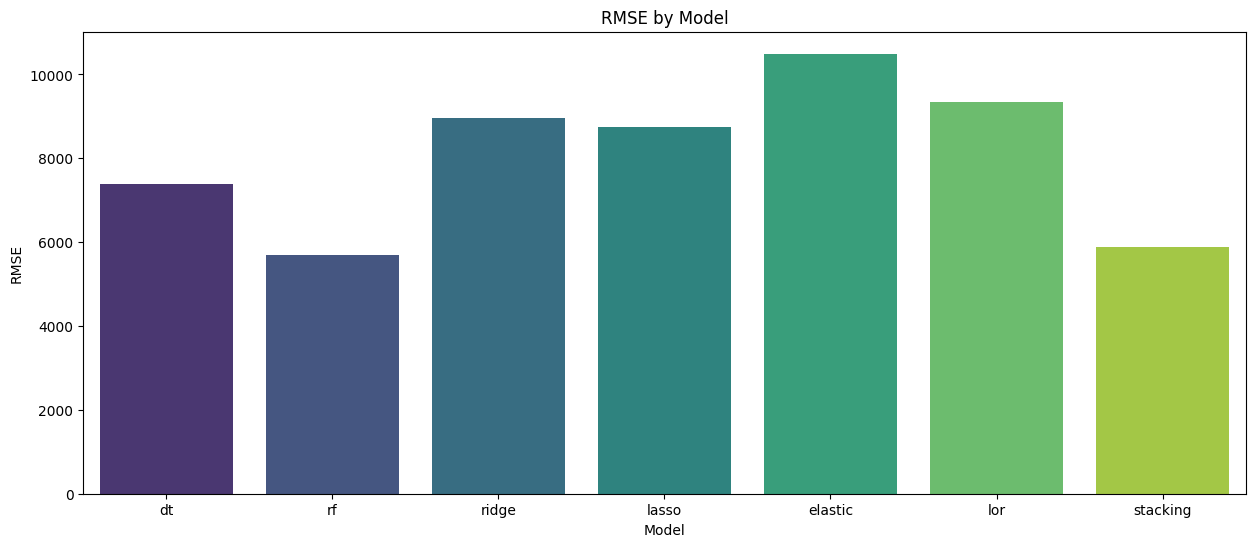

,model,rmse
0,dt,7380.312113
1,rf,5705.270622
2,ridge,8959.422073
3,lasso,8757.426581
4,elastic,10494.066395
5,lor,9334.862637
6,stacking,5887.279472


In [77]:
rmse = {'model':['dt', 'rf', 'ridge', 'lasso', 'elastic', 'lor', 'stacking'],
        'rmse': [dt_avg_rmse, rf_avg_rmse, ridge_avg_rmse, lasso_avg_rmse, elastic_avg_rmse, lor_avg_rmse, rf_rmse_stack]}

df_rmse = pd.DataFrame(rmse)

# 차트 설정
plt.figure(figsize=(15, 6))
sns.barplot(x='model', y='rmse', data=df_rmse, palette='viridis')
plt.title('RMSE by Model')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.show()
df_rmse